In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import os

plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 16

In [68]:
climate = 'LA'
file1 = 'BICBase_{0}_hLoad_lHours/BICBase.txt'.format(climate)
#file2 = 'BICBase_{0}_hLoad_lHours/BICBase_ts.csv'.format(climate)

file3 = 'BICMid_{0}_hLoad_lHours/BICMid.txt'.format(climate)
#file4 = 'BICMid_{0}_hLoad_lHours/BICMid_ts.csv'.format(climate)

file5 = 'Guideline36_{0}_hLoad_lHours/Guideline36.txt'.format(climate)
#file6 = 'Guideline36_{0}_hLoad_lHours/Guideline36_ts.csv'.format(climate)

In [69]:
#def load_results(result_file1, result_file2, resample=False):
def load_results(result_file1, resample=False):
    result_folder = '/mnt/hgfs/E/simulations'
    result_path1 = os.path.join(result_folder,result_file1)
    #result_path2 = os.path.join(result_folder,result_file2)
    df_ts = pd.read_csv(result_path1)
    df_temp = pd.read_csv(result_path2)
    df_ts.index = pd.to_datetime(df_ts['Time'],unit='s')
    df_temp.index = pd.to_datetime(df_temp['Time'],unit='s')
    df = pd.concat([df_ts,df_temp],axis=1)
    df = df[~df.index.duplicated(keep='first')]
    if resample:
        df = df.drop_duplicates()
        df = df.resample('10Min').mean()
    
    return df

### Plot annual results

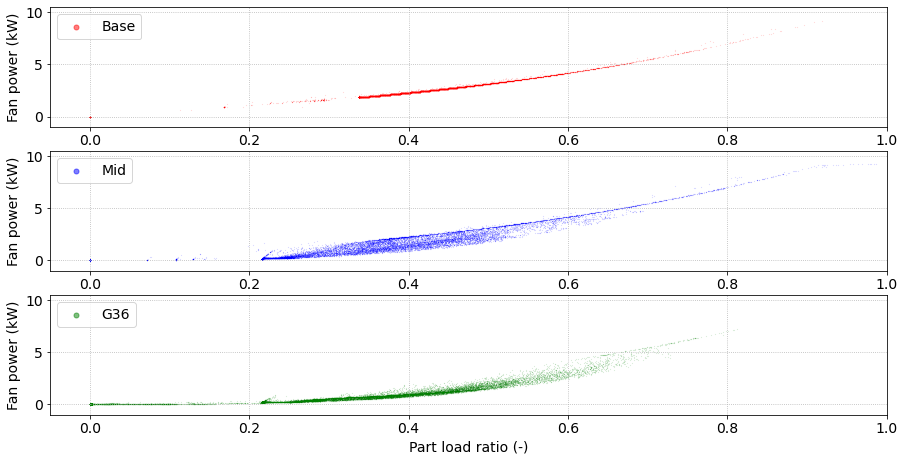

In [62]:
# get whole year data
df_base_a = load_results(file1,file2,resample=True)
df_mid_a = load_results(file3,file4,resample=True)
df_g36_a = load_results(file5,file6,resample=True)

if climate == 'SF':
    m_nominal = 6.792 # unit = kg/s
elif climate == 'LA':
    m_nominal = 6.125
else:
    m_nominal = 6.763
    
fig = plt.figure(figsize=(15,7.5))
plt.rcParams['font.size'] = 14
ax1 = fig.add_subplot(3,1,1)
plt.scatter(df_base_a['AHU.returnAir.m_flow']/m_nominal,df_base_a['res.PFan']/1000,s=0.01,c='red',alpha=0.5,label='Base')
ax2 = fig.add_subplot(3,1,2)
plt.scatter(df_mid_a['AHU.returnAir.m_flow']/m_nominal,df_mid_a['res.PFan']/1000,s=0.01,c='blue',alpha=0.5,label='Mid')
ax3 = fig.add_subplot(3,1,3)
plt.scatter(df_g36_a['AHU.returnAir.m_flow']/m_nominal,df_g36_a['res.PFan']/1000,s=0.01,c='green',alpha=0.5,label='G36')
plt.xlabel('Part load ratio (-)')
for ax in [ax1,ax2,ax3]:
    ax.grid(linestyle='dotted')
    ax.set_ylabel('Fan power (kW)')
    ax.set_ylim([-1,10.5])
    ax.set_xlim([-0.05,1.0])
    ax.legend(loc='upper left',markerscale=50);
plt.savefig('fan_{0}.png'.format(climate),bbox_inches='tight')

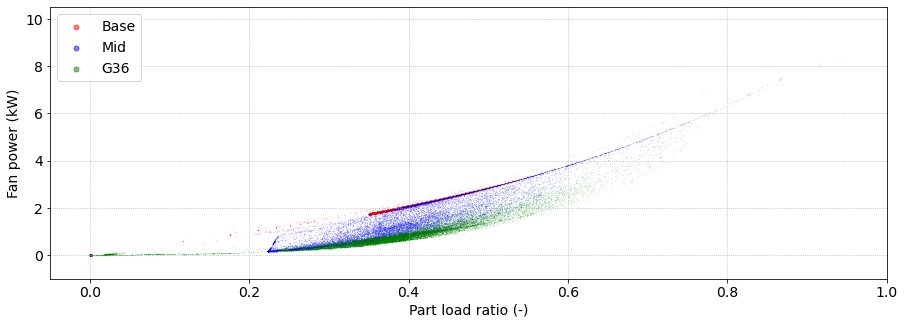

In [70]:
# get whole year data
df_base_a = load_results(file1,file2,resample=True)
df_mid_a = load_results(file3,file4,resample=True)
df_g36_a = load_results(file5,file6,resample=True)

if climate == 'SF':
    m_nominal = 6.792 # unit = kg/s
elif climate == 'LA':
    m_nominal = 6.125
else:
    m_nominal = 6.763

fig = plt.figure(figsize=(15,5))
plt.rcParams['font.size'] = 14
ax = fig.add_subplot(1,1,1)
plt.scatter(df_base_a['AHU.returnAir.m_flow']/m_nominal,df_base_a['res.PFan']/1000,s=0.01,c='red',alpha=0.5,label='Base')
#ax2 = fig.add_subplot(3,1,2)
plt.scatter(df_mid_a['AHU.returnAir.m_flow']/m_nominal,df_mid_a['res.PFan']/1000,s=0.01,c='blue',alpha=0.5,label='Mid')
#ax3 = fig.add_subplot(3,1,3)
plt.scatter(df_g36_a['AHU.returnAir.m_flow']/m_nominal,df_g36_a['res.PFan']/1000,s=0.01,c='green',alpha=0.5,label='G36')
plt.xlabel('Part load ratio (-)')
#for ax in [ax1,ax2,ax3]:
ax.grid(linestyle='dotted')
ax.set_ylabel('Fan power (kW)')
ax.set_ylim([-1,10.5])
ax.set_xlim([-0.05,1.0])
ax.legend(loc='upper left',markerscale=50)
plt.savefig('fan_{0}.png'.format(climate),bbox_inches='tight');

### Plot timeseries for three seasons: spring, summer and winter

In [6]:
def cal_mean_temp(df):
    TZon_col = df.loc[:,'Building.zoneVAV1.zon.TAir':'Building.zoneVAV21.zon.TAir']
    df['TZonMea'] = TZon_col.mean(axis=1)-273.15
    
    return df

In [116]:
def cal_heat_power(df):
    df['PHea'] = (df['res.PHeaAHU']+df['res.PHeaReh'])/1000
    
    return df

In [117]:
def cal_cool_power(df):
    df['PCoo'] = -(df['res.PCooSen']+df['res.PCooLat'])/1000
    
    return df

In [118]:
df_base = load_results(file1,file2)
df_base = cal_mean_temp(df_base)
df_base = cal_cool_power(df_base)
df_base = cal_heat_power(df_base)

In [119]:
df_mid = load_results(file3,file4)
df_mid = cal_mean_temp(df_mid)
df_mid = cal_cool_power(df_mid)
df_mid = cal_heat_power(df_mid)

In [120]:
df_g36 = load_results(file5,file6)
df_g36 = cal_mean_temp(df_g36)
df_g36 = cal_cool_power(df_g36)

In [121]:
def plot_ts(start,end):
    plt.rcParams['font.size'] = 14
    fig = plt.figure(figsize=(16,24))
    ax1 = fig.add_subplot(6,1,1)
    df_base['TZonMea'].loc[start:end].plot(color='red',label='Base')
    df_mid['TZonMea'].loc[start:end].plot(color='blue',label='Mid')
    df_g36['TZonMea'].loc[start:end].plot(color='green',label='G36')
    (df_base['Building.TRooHeaSet']-273.15).loc[start:end].plot(color='gray',label='Heating setpoint')
    (df_base['Building.TRooCooSet']-273.15).loc[start:end].plot(color='gray',label='Cooling setpoint')
    plt.xticks(rotation=0)
    plt.ylabel('Average zone temperature ($^\circ C$)')

    ax2 = fig.add_subplot(6,1,2)
    (df_base['weather.weaBus.TDryBul']-273.15).loc[start:end].plot(color='yellow',label='Outdoor dry bulb')
    (df_base['AHU.TSup.T']-273.15).loc[start:end].plot(color='red',label='Base')
    (df_mid['AHU.TSup.T']-273.15).loc[start:end].plot(color='blue',label='Mid')
    (df_g36['AHU.TSup.T']-273.15).loc[start:end].plot(color='green',label='G36')
    plt.xticks(rotation=0)
    plt.ylabel('SAT ($^\circ C$)')
    
    ax3 = fig.add_subplot(6,1,3)
    (df_base['AHU.returnAir.m_flow']/1.2).loc[start:end].plot(color='red',label='Base')
    (df_mid['AHU.returnAir.m_flow']/1.2).loc[start:end].plot(color='blue',label='Mid')
    (df_g36['AHU.returnAir.m_flow']/1.2).loc[start:end].plot(color='green',label='G36')
    plt.xticks(rotation=0)
    plt.ylabel('System airflow ($m^3/s$)')

    ax4 = fig.add_subplot(6,1,4)
    df_base['AHU.VOut1.V_flow'].loc[start:end].plot(color='red',label='Base')
    df_mid['AHU.VOut1.V_flow'].loc[start:end].plot(color='blue',label='Mid')
    df_g36['AHU.VOut1.V_flow'].loc[start:end].plot(color='green',label='G36')
    df_g36['conAHU.VEffOutAir_flow'].loc[start:end].plot(color='cyan',label='G36 design')
    plt.xticks(rotation=0)
    plt.ylabel('Outdoor airflow ($m^3/s$)')

    ax5 = fig.add_subplot(6,1,5)
    df_base['PCoo'].loc[start:end].plot(color='red',label='Base')
    df_mid['PCoo'].loc[start:end].plot(color='blue',label='Mid')
    df_g36['PCoo'].loc[start:end].plot(color='green',label='G36')
    plt.xticks(rotation=0)
    plt.ylabel('Cooling power ($kW$)')

    ax6 = fig.add_subplot(6,1,6)
    df_base['PHea'].loc[start:end].plot(color='red',label='Base')
    df_mid['PHea'].loc[start:end].plot(color='blue',label='Mid')
    (df_g36['res.PHea']/1000).loc[start:end].plot(color='green',label='G36')
    plt.xticks(rotation=0)
    plt.ylabel('Heating power ($kW$)')
    
    for ax in [ax1,ax2,ax3,ax4,ax5,ax6]:
        myFmt = mdates.DateFormatter('%m-%d')
        ax.xaxis.set_major_formatter(myFmt)
        ax.legend()
        ax.grid(linestyle ='dotted')
        ax.set_xlabel('')
    ax6.set_xlabel('Date')
    plt.subplots_adjust(hspace=0.15);

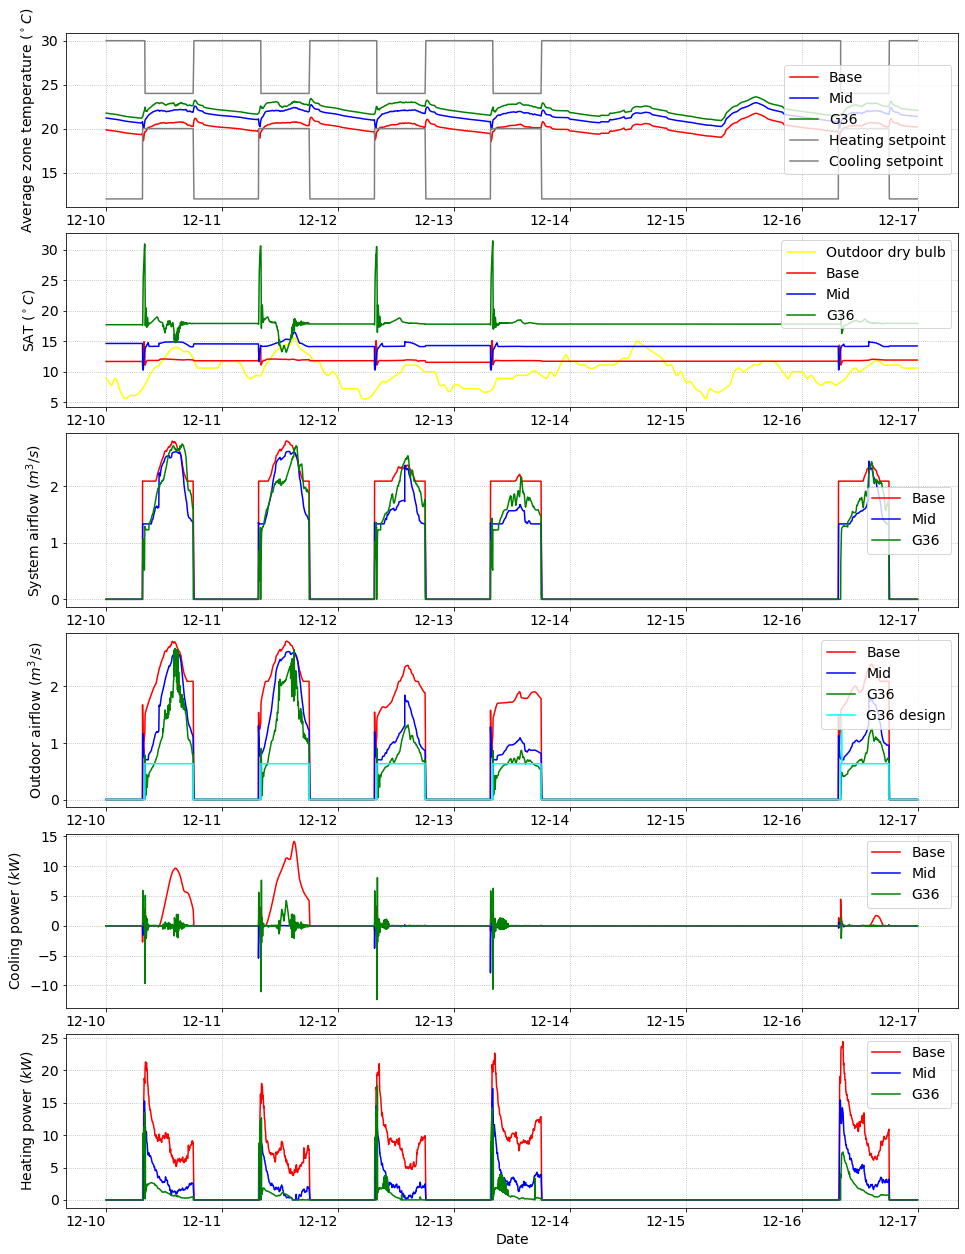

In [122]:
winter_start = '1970-12-10'
winter_end = '1970-12-16'
plot_ts(winter_start,winter_end)
plt.savefig('winter_{0}.png'.format(climate),bbox_inches='tight')

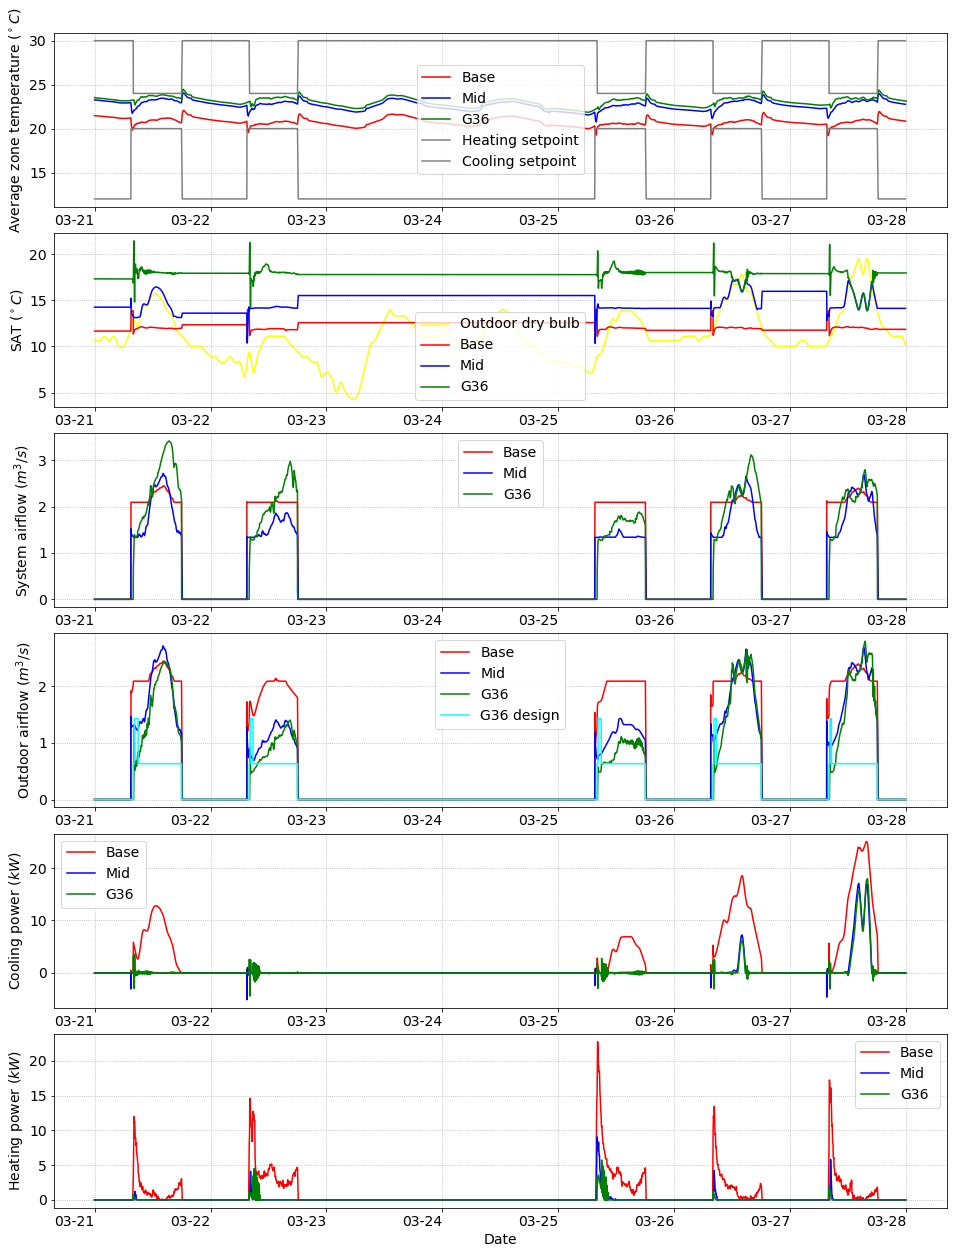

In [123]:
spring_start = '1970-03-21'
spring_end = '1970-03-27'
plot_ts(spring_start,spring_end)
plt.savefig('spring_{0}.png'.format(climate),bbox_inches='tight')

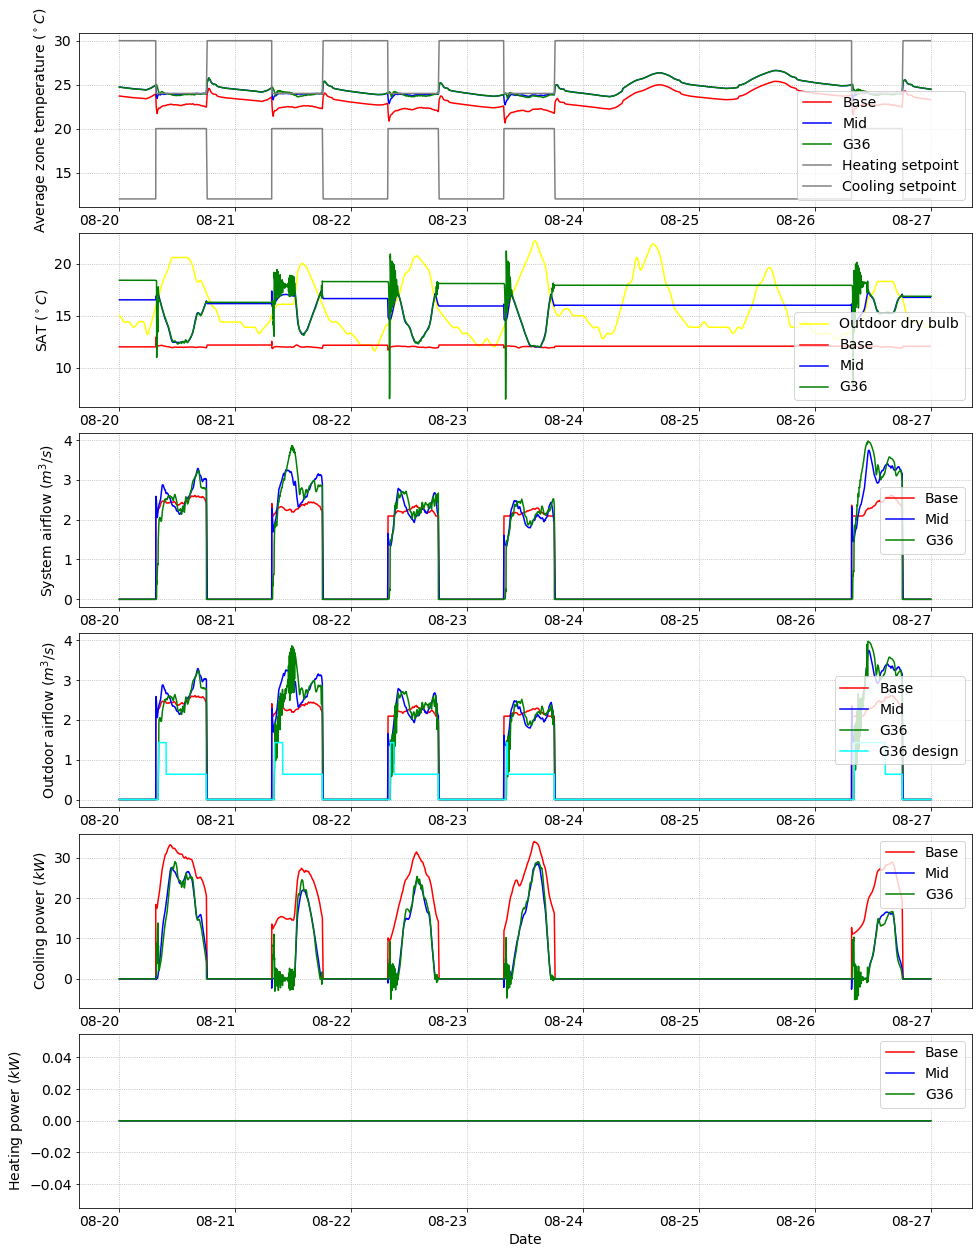

In [124]:
summer_start = '1970-08-20'
summer_end = '1970-08-26'
plot_ts(summer_start,summer_end)
plt.savefig('summer_{0}.png'.format(climate),bbox_inches='tight')

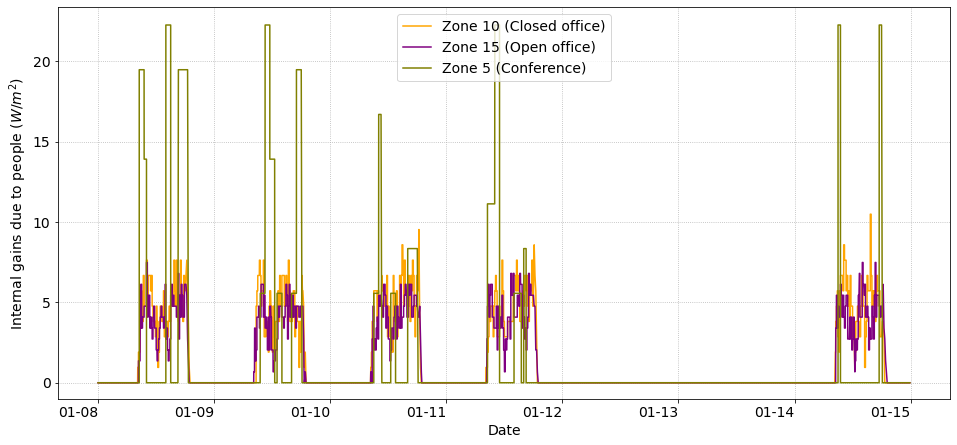

In [93]:
df_ig = pd.read_csv('/mnt/hgfs/E/simulations/BICBase_LA_hLoad_lHours/BICBase_ig.csv')
df_ig.index = pd.to_datetime(df_ig['Time'],unit='s')
df_ig = df_ig[~df_ig.index.duplicated(keep='first')]
start = '1970-1-8'
end = '1970-1-14'
def plot_int_gains(name):
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(1,1,1)
    df_ig['internalGains.{}.y[10]'.format(name)].loc[start:end].plot(color='orange',label='Zone 10 (Closed office)')
    df_ig['internalGains.{}.y[15]'.format(name)].loc[start:end].plot(color='purple',label='Zone 15 (Open office)')
    df_ig['internalGains.{}.y[5]'.format(name)].loc[start:end].plot(color='olive',label='Zone 5 (Conference)')
    plt.xticks(rotation=0)
    plt.ylabel('Internal gains due to {} ($W/m^2$)'.format(name))
    myFmt = mdates.DateFormatter('%m-%d')
    ax.xaxis.set_major_formatter(myFmt)
    plt.legend(loc='upper center')
    ax.grid(linestyle ='dotted')
    ax.set_xlabel('Date')
    plt.ylim(bottom=-1)
    plt.savefig('{0}.png'.format(name),bbox_inches='tight')
    
plot_int_gains('people')

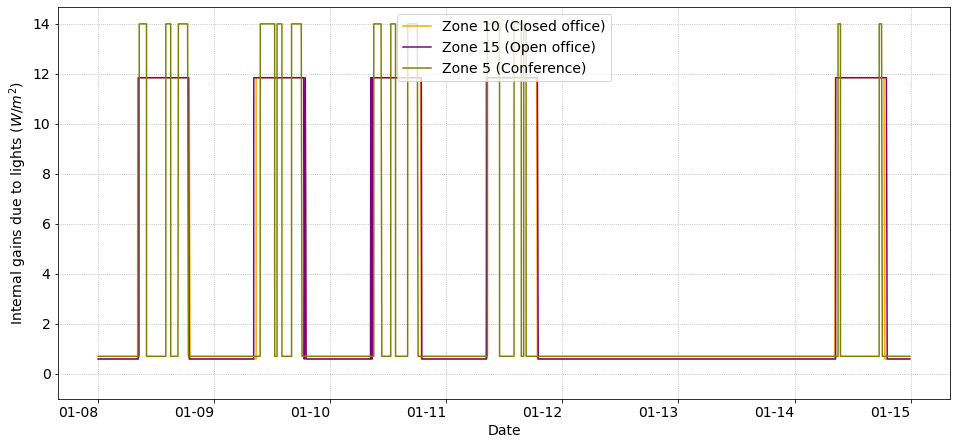

In [94]:
plot_int_gains('lights')

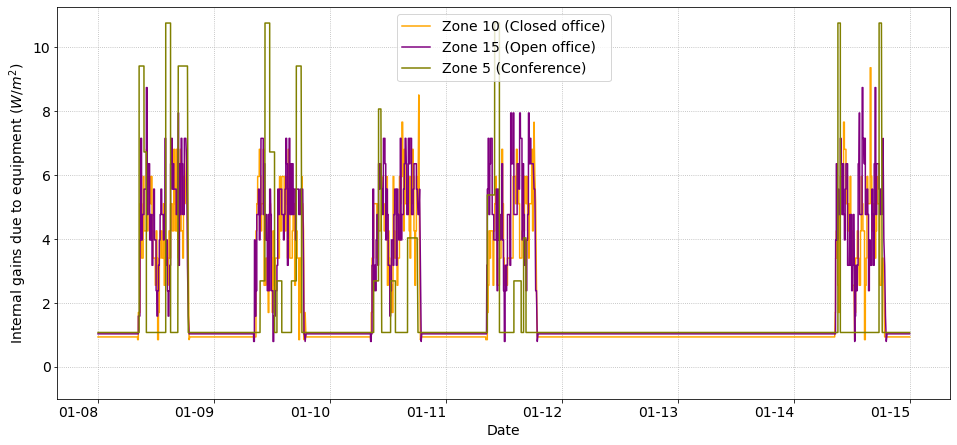

In [95]:
plot_int_gains('equipment')

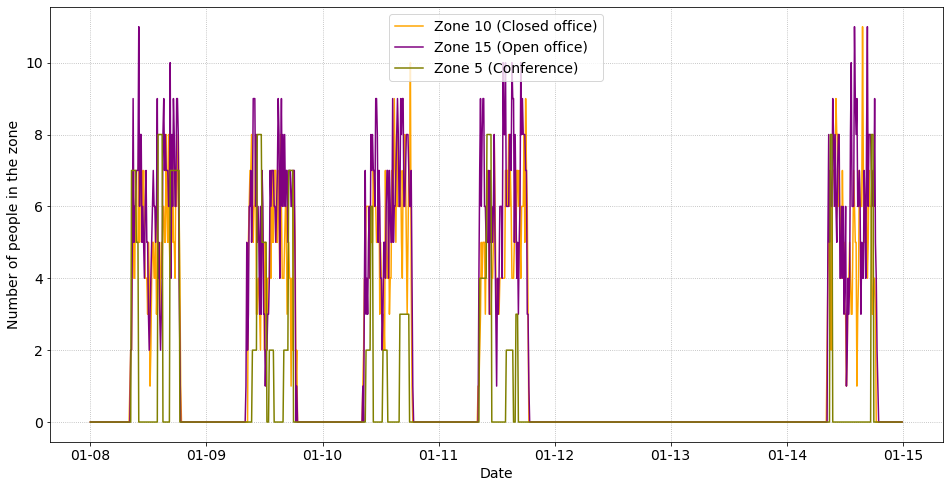

In [96]:
file_path = '/home/kun/Documents/bic-savcal36/BestInClass/Resources/intGai/occupancySimulator_low.csv'
timestep = 600
data_type = 'float'
# read the existing occ
occ = pd.read_csv(file_path, skiprows=6)
occ = occ.drop(occ.columns[15:],axis=1)
# add the first row as step 0
occ.loc[-1] = occ.loc[0]
occ.index = occ.index+1
occ.sort_index(inplace=True)
# convert string to datetime
occ['Time'] = '1970 ' + occ['Time']
occ['Time'] = pd.to_datetime(occ['Time'])
occ.index = occ['Time']
# add EnergyPlus zone names to the exisiting columns
header = ['Step', 'Time',
          'ENCLOSEDOFFICE_MID_1 ZN','ENCLOSEDOFFICE_MID_2 ZN',
          'CONFROOM_MID_1 ZN', 'CONFROOM_MID_2 ZN',
          'LOBBY_MID ZN', 'CORRIDOR_MID_1 ZN',
          'CORRIDOR_MID_2 ZN', 'OPENOFFICE_MID_1 ZN',
          'OPENOFFICE_MID_2 ZN', 'OPENOFFICE_MID_3 ZN',
          'OPENOFFICE_MID_4 ZN', 'ENCLOSEDOFFICE_MID_3 ZN', 'DINING_MID ZN']
occ.columns = header
occ = occ.reindex(sorted(occ.columns), axis=1)
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
start = '1970-1-8'
end = '1970-1-14'

plt.plot(occ['Time'].loc[start:end],(occ['ENCLOSEDOFFICE_MID_1 ZN']*11).loc[start:end],color='orange',label='Zone 10 (Closed office)')
plt.plot(occ['Time'].loc[start:end],(occ['OPENOFFICE_MID_1 ZN']*13).loc[start:end],color='purple',label='Zone 15 (Open office)')
plt.plot(occ['Time'].loc[start:end],(occ['CONFROOM_MID_1 ZN']*8).loc[start:end],color='olive',label='Zone 5 (Conference)')
plt.xticks(rotation=0)
plt.ylabel('Number of people in the zone')
myFmt = mdates.DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(myFmt)
plt.legend(loc='upper center')
ax.grid(linestyle ='dotted')
ax.set_xlabel('Date')
plt.savefig('occupants.png',bbox_inches='tight')